In [32]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision import transforms
from GAN import Generator,Discriminator

In [33]:
# generator = Generator()
# discriminator = Discriminator()
generator = torch.load('./GAN weights/generator.pt')
discriminator = torch.load('./GAN weights/discriminator.pt')

C:\Users\vishw\AppData\Local\Temp\ipykernel_34596\2003919609.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load('./GAN weights/generator.pt')
C:\User

In [34]:
# generator.load_state_dict(torch.load('./GAN weights/generator.pt'))
# discriminator.load_state_dict(torch.load('./GAN weights/discriminator.pt'))

In [35]:
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

In [36]:
discriminator.eval()

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [37]:
latent_dim = 100
z = torch.randn(64, latent_dim).to('cuda')  # Batch of 64 random latent vectors
generated_imgs = generator(z)

In [38]:
generated_imgs_cpu = generated_imgs.cpu().detach().numpy()

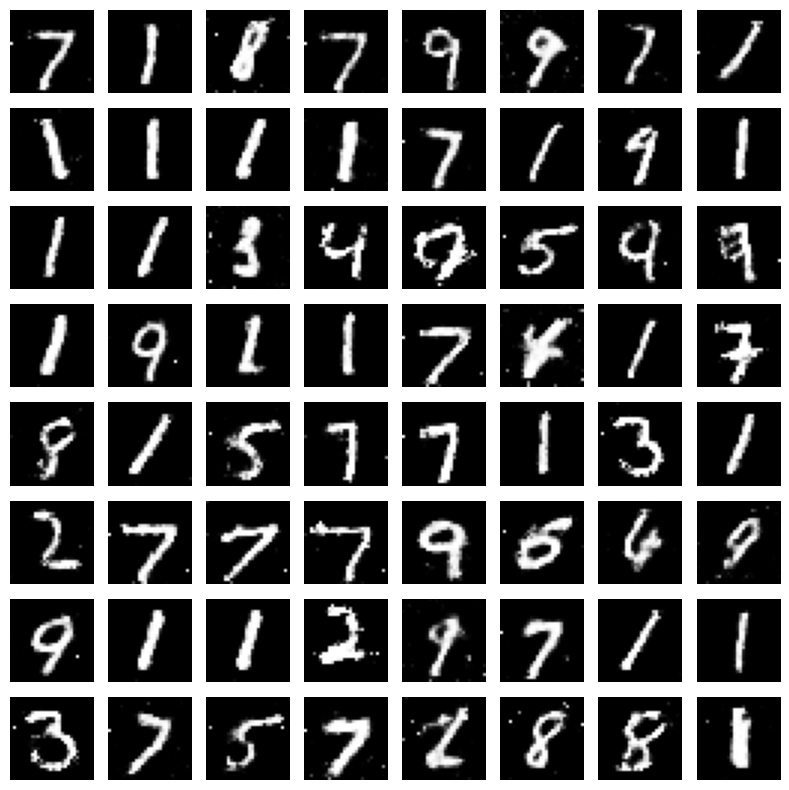

In [39]:
import matplotlib.pyplot as plt
import numpy as np
# Reshape to (batch_size, height, width) assuming grayscale images
generated_imgs_cpu = generated_imgs_cpu.reshape(64, 28, 28)

# Set up the plot grid (8x8 for 64 images)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

# Loop through each image and add it to the grid
for i, ax in enumerate(axes.flat):
    # images.append(generated_imgs_cpu[i])
    ax.imshow(generated_imgs_cpu[i], cmap='gray')
    ax.axis('off')  # Hide axes for cleaner display

plt.tight_layout()
plt.show()


In [40]:
generated_imgs_cpu.shape

(64, 28, 28)

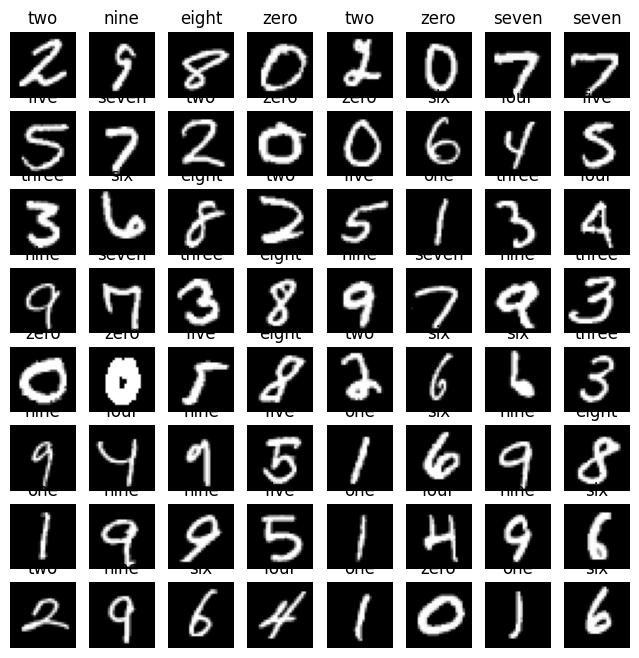

In [41]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

# Transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Download and load the MNIST dataset
train_dataset = MNIST(root='./mnist_data', train=True, transform=transform, download=True)
images = []
# Mapping from label to text for display purposes
labels_map = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
}

# Create a figure to display the images (8x8 grid = 64 images)
figure = plt.figure(figsize=(8, 8))
cols, rows = 8, 8  # 8 columns and 8 rows for 64 images

for i in range(1, cols * rows + 1):
    # Select a random index from the dataset
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    images.append(img.squeeze().detach().cpu().numpy())
    # Add the image to the subplot grid
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")  # Turn off axes for clean display
    plt.imshow(img.squeeze(), cmap="gray")  # Display the image in grayscale

# Display the figure with the 64 random images
plt.show()
images = np.array(images)

In [42]:
images.shape

(64, 28, 28)

In [43]:
generated_imgs_cpu.shape

(64, 28, 28)

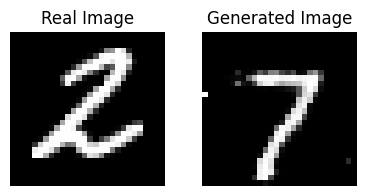

In [44]:
import cv2
import matplotlib.pyplot as plt

test_real = images[0]
test_gen = generated_imgs_cpu[0]
test_gen = test_gen.reshape(28,28,1)
test_real = test_real.reshape(28,28,1)

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(4,2))  # 1 row, 2 columns

# Display the real image
axes[0].imshow(test_real.squeeze(), cmap='gray')  # Squeeze if needed
axes[0].set_title('Real Image')  # Title for the first image
axes[0].axis('off')  # Turn off axes

# Display the generated image
axes[1].imshow(test_gen.squeeze(), cmap='gray')  # Squeeze if needed
axes[1].set_title('Generated Image')  # Title for the second image
axes[1].axis('off')  # Turn off axes

# Show the figure
plt.tight_layout()  # Adjust layout
plt.show()

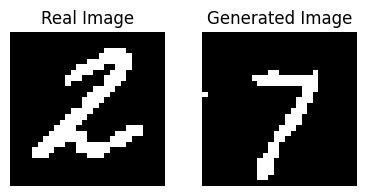

In [45]:
ret,real_thresh = cv2.threshold(test_real,0,127,cv2.THRESH_BINARY)
ret,gen_thresh = cv2.threshold(test_gen,0,127,cv2.THRESH_BINARY)
# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(4, 2))  # 1 row, 2 columns

# Display the real image
axes[0].imshow(real_thresh.squeeze(), cmap='gray')  # Squeeze if needed
axes[0].set_title('Real Image')  # Title for the first image
axes[0].axis('off')  # Turn off axes

# Display the generated image
axes[1].imshow(gen_thresh.squeeze(), cmap='gray')  # Squeeze if needed
axes[1].set_title('Generated Image')  # Title for the second image
axes[1].axis('off')  # Turn off axes

# Show the figure
plt.tight_layout()  # Adjust layout
plt.show()

In [46]:
real_image_uint8 = (test_real * 255).astype(np.uint8)
generated_image_uint8 = (test_gen * 255).astype(np.uint8)

In [47]:
real_edges = cv2.Canny(real_image_uint8,100,200)
generated_edges = cv2.Canny(generated_image_uint8, 100, 200)

In [48]:
# Calculate Laplacian Variance for sharpness
real_laplacian_var = cv2.Laplacian(real_image_uint8, cv2.CV_64F).var()
generated_laplacian_var = cv2.Laplacian(generated_image_uint8, cv2.CV_64F).var()

In [49]:
print(f"Real Image Sharpness: {real_laplacian_var}")
print(f"Generated Image Sharpness: {generated_laplacian_var}")

Real Image Sharpness: 18144.65306122449
Generated Image Sharpness: 13513.808307410973


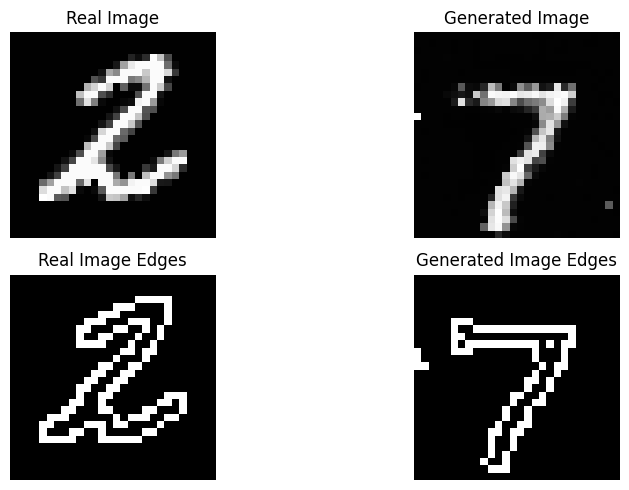

In [50]:
# Display images and their edges
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title("Real Image")
plt.imshow(real_image_uint8, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Generated Image")
plt.imshow(generated_image_uint8, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Real Image Edges")
plt.imshow(real_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Generated Image Edges")
plt.imshow(generated_edges, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

# Evaluation of discriminator

In [51]:
# If you haven't already, set up the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_dataset = MNIST(root='./mnist_data', train=True, transform=transform, download=True)

# Get a batch of real images
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
real_imgs, _ = next(iter(dataloader))
real_imgs = real_imgs.to('cuda')

In [52]:
with torch.no_grad():
    real_scores = discriminator(real_imgs.view(real_imgs.size(0), -1))
    fake_scores = discriminator(generated_imgs)



In [53]:
print(f"Average score for real images: {real_scores.mean().item():.4f}")
print(f"Average score for fake images: {fake_scores.mean().item():.4f}")

# Calculate accuracy
real_accuracy = (real_scores > 0.5).float().mean().item()
fake_accuracy = (fake_scores < 0.5).float().mean().item()

print(f"Accuracy on real images: {real_accuracy:.4f}")
print(f"Accuracy on fake images: {fake_accuracy:.4f}")

Average score for real images: 0.7095
Average score for fake images: 0.2338
Accuracy on real images: 0.7031
Accuracy on fake images: 0.9375


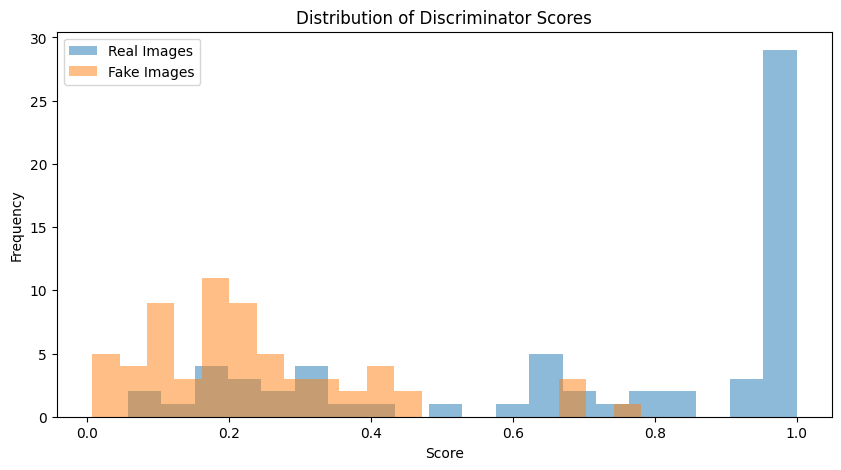

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(real_scores.cpu().numpy(), bins=20, alpha=0.5, label='Real Images')
plt.hist(fake_scores.cpu().numpy(), bins=20, alpha=0.5, label='Fake Images')
plt.legend()
plt.title('Distribution of Discriminator Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()